In [1]:
from src.sga import SGA
from src.fitnessfunction import ObjectiveSine, ObjectiveLinReg
from src.lin_reg import LinReg
import numpy as np
import matplotlib.pyplot as plot
seed = 99
# seed = None

## Sine fitness function

In [2]:
def plot_sin(population):
    # Sine wave
    x1 = np.arange(1, 128, 0.1)
    y1 = np.sin(x1)

    # Individuals
    x2 = [individual.value for individual in population.individuals]
    y2 = [individual.fitness for individual in population.individuals]

    plot.plot(x1, y1)
    plot.scatter(x2, y2)
    plot.show()

### Run simulation, maximize.

In [3]:
params_sine = {
    "objective_function": ObjectiveSine().get_fitness,
    "maximize": True,
    "pop_size": 100,
    "individual_size": 15,
    "max_generations": 5,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
}

In [5]:
sga = SGA(**params_sine)
sga.simulate()
solution = sga.get_solution()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: -0.0236246986407213
Generation 1 avg. fitness: 0.6103859586982202
Generation 2 avg. fitness: 0.8312290787843685
Generation 3 avg. fitness: 0.9337200653993694
Generation 4 avg. fitness: 0.9687419677080594
Generation 5 avg. fitness: 0.9777800290886759
[1 1 1 1 0 0 0 1 1 1 1 0 0 1 1] 120.94921875 0.9999977983318141


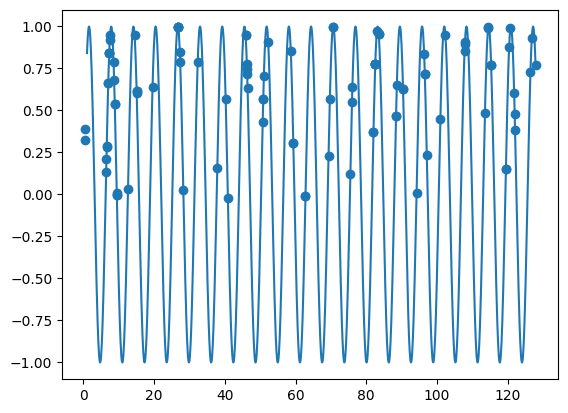

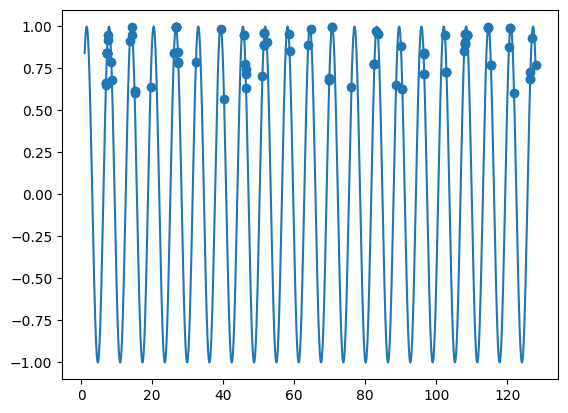

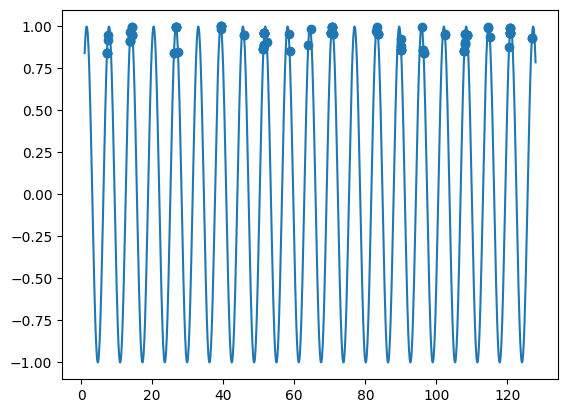

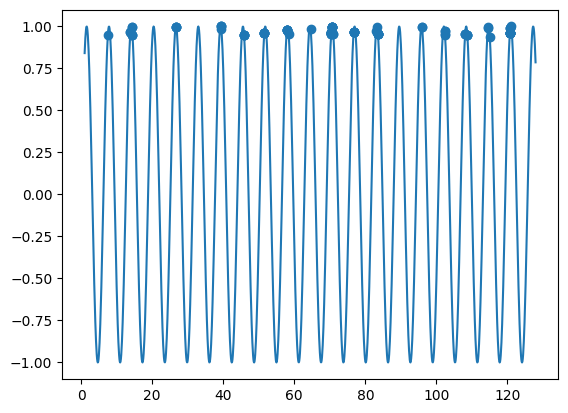

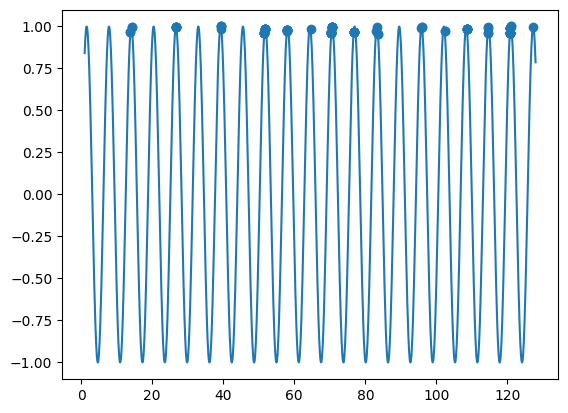

In [6]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

#### Run simulation with constraint

In [10]:
sga = SGA(**params_sine)
sga.simulate()
constraint = [5,10]
solution = sga.get_solution(constraint)

if solution is not None:
    print(solution.bitstring, solution.value, solution.fitness)
else:
    print("Could not find a solution that satisfies the constraint")

Generation 0 avg. fitness: -0.03630246688659303
Generation 1 avg. fitness: 0.6771940224310384
Generation 2 avg. fitness: 0.8702557221562666
Generation 3 avg. fitness: 0.9631662865771021
Generation 4 avg. fitness: 0.9771736113974062
Generation 5 avg. fitness: 0.9858538435976425
[0 0 0 0 0 0 1 1 0 0 1 0 0 1 0] 1.5703125 0.9999998829558185


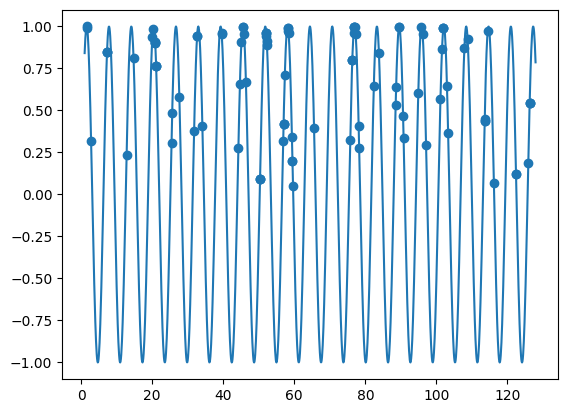

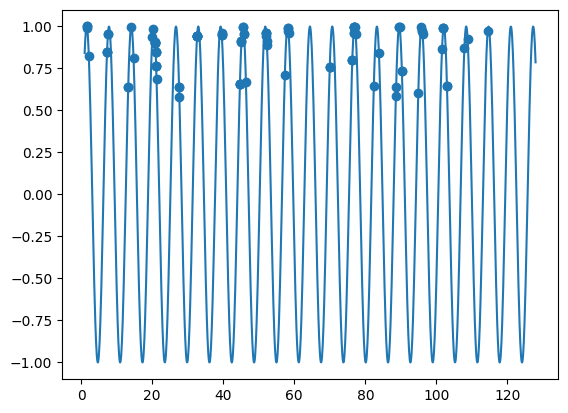

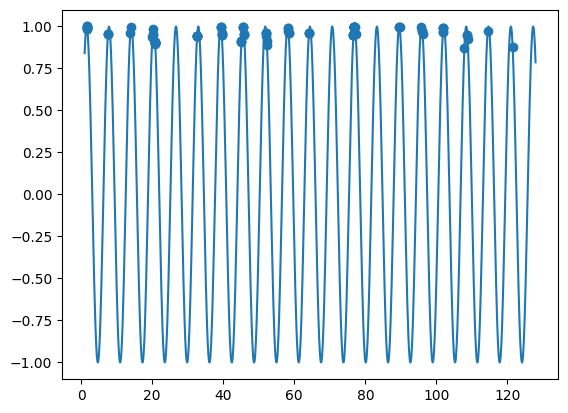

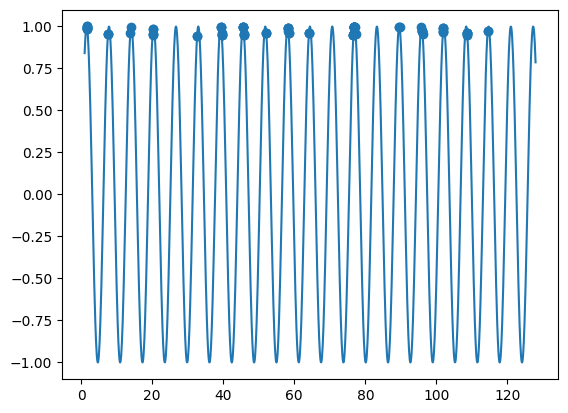

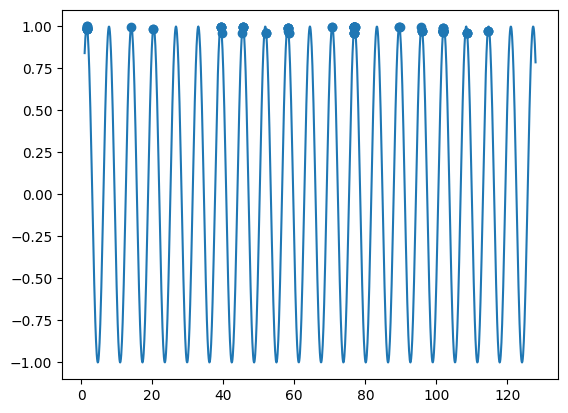

In [11]:
# Plot
generations = sga.get_generations()
for g in generations:
    plot_sin(g)

## Linear regression of dataset

In [6]:
# Load dataset
data_path = r"./data/dataset.txt"
df = np.genfromtxt(data_path, delimiter=",")
y = df[:, -1]
X = np.delete(df, -1, axis=1)

### Run the simulation, Minimize

In [7]:
# Run on entire dataset
linreg_err = LinReg().get_fitness(X, y, seed)
print(f"RMSE entire dataset: {linreg_err}")

RMSE entire dataset: 0.13530625063199608


In [8]:
params_linreg = {
    "objective_function": ObjectiveLinReg(X, y, seed=seed).get_fitness,
    "maximize": False,
    "pop_size": 250,
    "individual_size": X.shape[1],
    "max_generations": 30,
    "crossover_rate": 0.6,
    "mutation_rate": 0.05,
}

In [9]:
sga = SGA(**params_linreg)
sga.simulate()
solution = sga.get_solultion()
print(solution.bitstring, solution.value, solution.fitness)

Generation 0 avg. fitness: 0.1363909187942144
Generation 1 avg. fitness: 0.13375102424114382
Generation 2 avg. fitness: 0.1324204373861723
Generation 3 avg. fitness: 0.1311808209851101
Generation 4 avg. fitness: 0.1301586567281634
Generation 5 avg. fitness: 0.12887060927839522
Generation 6 avg. fitness: 0.12786974745335555
Generation 7 avg. fitness: 0.12715504593312524
Generation 8 avg. fitness: 0.12652801934710872
Generation 9 avg. fitness: 0.12576475401285228
Generation 10 avg. fitness: 0.12513771926381168
Generation 11 avg. fitness: 0.12437629903418258
Generation 12 avg. fitness: 0.1240193323421671
Generation 13 avg. fitness: 0.12379553420263609
Generation 14 avg. fitness: 0.12352183375948314
Generation 15 avg. fitness: 0.12322630088532671
Generation 16 avg. fitness: 0.12289832381693157
Generation 17 avg. fitness: 0.12273890499062882
Generation 18 avg. fitness: 0.12257629876350563
Generation 19 avg. fitness: 0.12240896064386636
Generation 20 avg. fitness: 0.12219573646718819
Generat